In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [2]:
dataset = pd.read_excel('sample.xls')


In [3]:
dataset.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [5]:
dataset['Order Year'] = dataset["Order Date"].dt.year


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [7]:
dataset['Order Date'].value_counts()

2016-09-05    38
2017-09-02    36
2016-11-10    35
2017-12-01    34
2017-12-02    34
              ..
2016-02-25     1
2016-10-25     1
2014-02-21     1
2016-10-18     1
2014-01-21     1
Name: Order Date, Length: 1237, dtype: int64

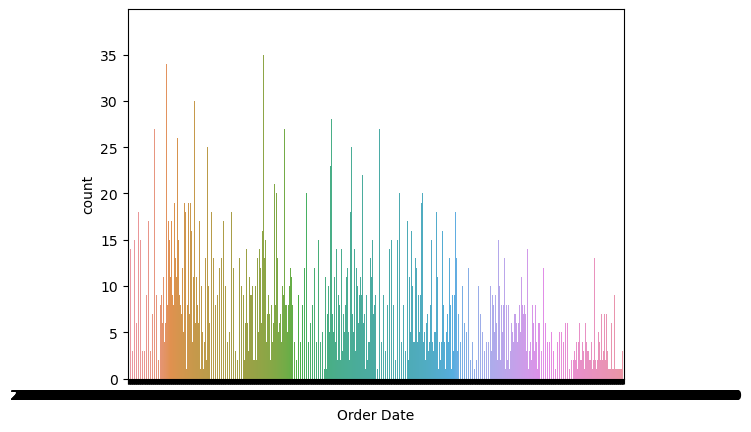

In [8]:
sns.countplot(x ="Order Date", data = dataset)
plt.savefig("Order Date.png")
plt.show()

# Category wise profit from the 

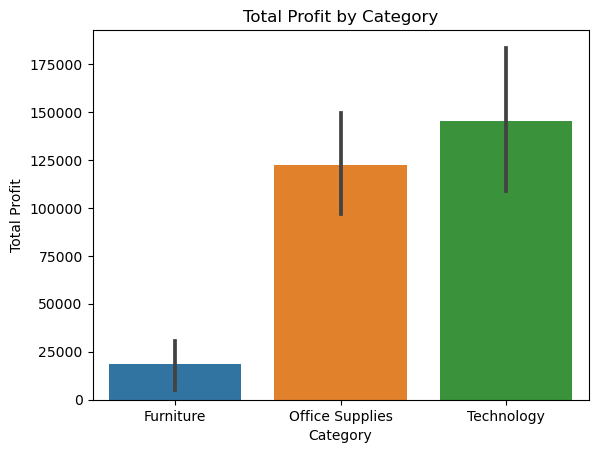

In [9]:
# Create the bar plot with sum of profits per category
sns.barplot(x="Category", y="Profit", data=dataset, estimator=sum)

# Add title and labels for clarity
plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.savefig("Categorywise profit.png")

# Product names and quantity

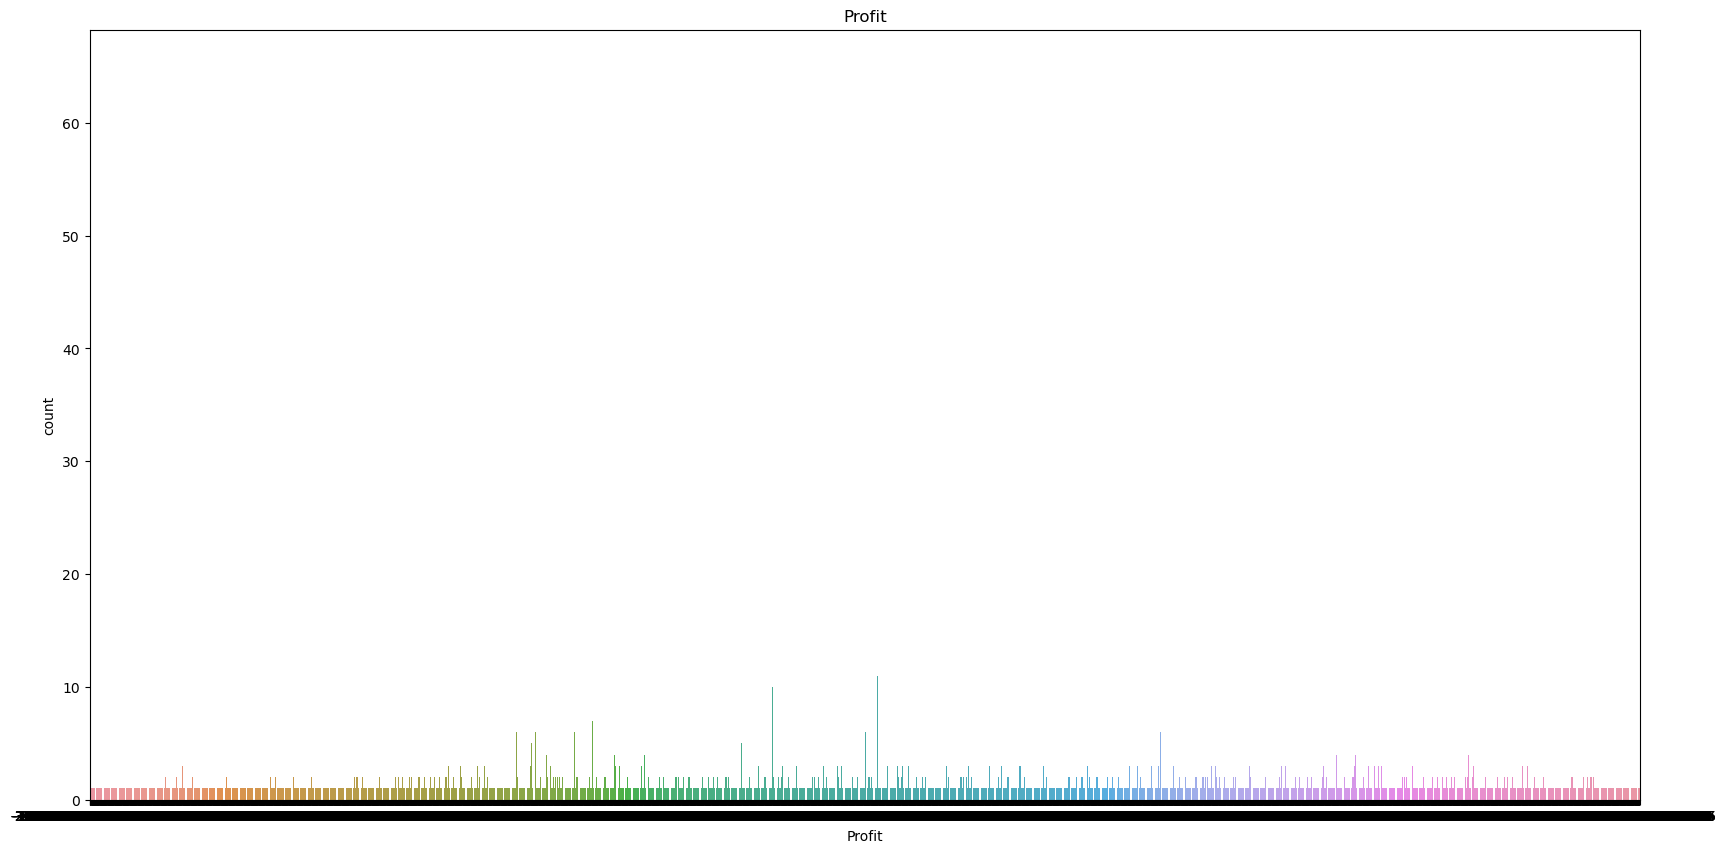

In [10]:

# Set figure size
plt.figure(figsize=(20, 10))

# Create a bar plot with Product Name on the x-axis and Profit on the y-axis


sns.countplot(x='Profit', data=dataset)
# Add title and labels
plt.title("Profit")


# Display the plot
plt.show()

In [11]:
dataset.shape

(9994, 22)

In [12]:
dataset.isnull().sum()


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
Order Year       0
dtype: int64

# Ship Mode data analysis

In [13]:
# 
dataset['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [14]:
dataset['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [15]:
 dataset['Ship Mode']= dataset['Ship Mode'].replace("Same Day", "Third Class")

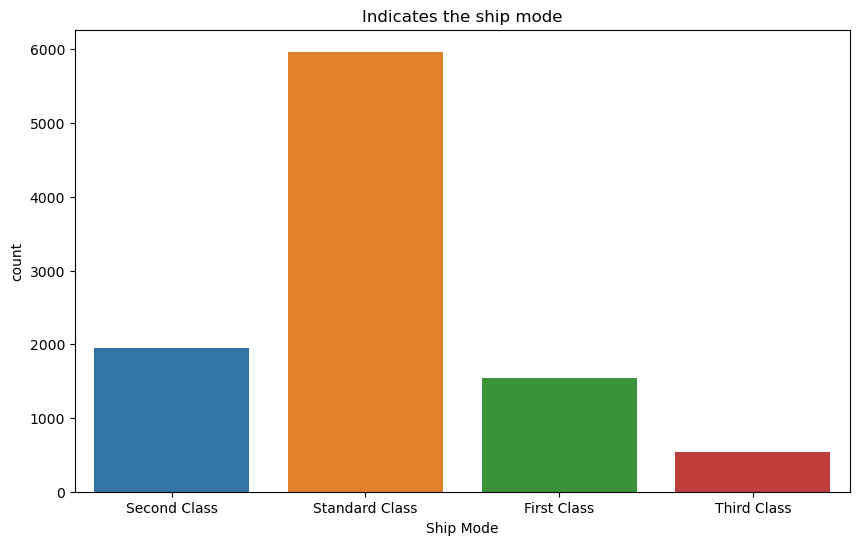

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Ship Mode', data=dataset)
plt.title("Indicates the ship mode")
plt.savefig("Count of Ship mode.jpg")
plt.show()

# Region data analysis


In [17]:
dataset['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [18]:
x = dataset['Region'].value_counts().index
y = dataset['Region'].value_counts().values

<function matplotlib.pyplot.show(close=None, block=None)>

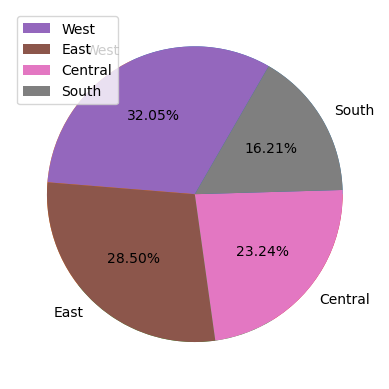

In [19]:
plt.pie(y)
plt.pie(y,labels=x,startangle = 60, autopct='%0.2f%%')
plt.legend(loc=2)
plt.savefig("Region analysis.png")
plt.show

# Regional data analysis with the segment

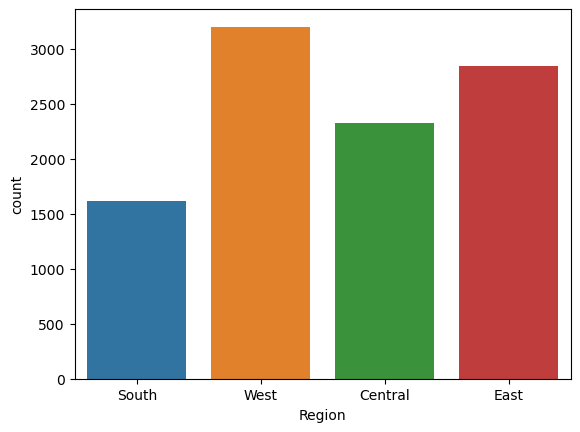

In [20]:
sns.countplot(x='Region', data=dataset)
plt.show()

# Product Segment


<AxesSubplot:xlabel='Segment', ylabel='count'>

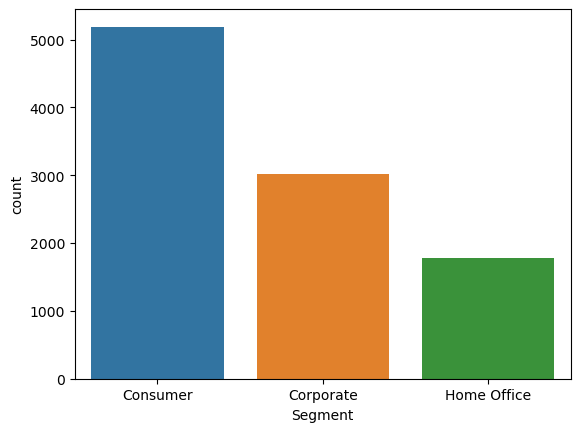

In [21]:
sns.countplot(x='Segment', data=dataset)